### Carlos Mauricio Arteaga Bermudez

## Implementacion modelo de regresion logistica.

- El modelo de regresion logistica sera implementado sobre un famoso dataset de la pagina https://www.kaggle.com/datasets/heptapod/titanic
- El conjunto de datos representan los Pasajeros que abordaron el Titanic.  

Este Dataset ha tenido un tratamiento previo respecto al original donde se han agregado algunas caracteristicas listadas a continuacion. 
- Fusión de los datos de entrenamiento y de prueba.
- Eliminados los atributos 'ticket' y 'cabina'.
- Trasladado el atributo «Survived» a la última columna.
- Se han añadido columnas cero adicionales para que las entradas categóricas se adapten mejor a One-Hot-Encoding.
- Se sustituyó los valores de los atributos «Sexo» y «Embarcado» por valores binarios y categóricos, respectivamente.
- Se rellenaron los valores que faltan en los atributos «Edad» y «Tarifa» con la mediana de los datos.

In [104]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats # libreria estadistica de Scipy
from sklearn.feature_selection import RFE # RFE es para seleccionar modelos
from sklearn.model_selection import train_test_split # para dividir la base en train y test
from sklearn import linear_model # para modelo lineal
from sklearn.metrics import mean_squared_error, r2_score # para sacar las metricas
import statsmodels.api as sm  ## Parte estadistica
from statsmodels.sandbox.regression.predstd import wls_prediction_std  ## Parte estadistica

In [105]:
import os
print(os.getcwd())

d:\EAN_Curso_Machine_Learning_1\Machine_Learning_1_EAN\Codigo\Talleres


In [106]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas 

In [107]:
df = pd.read_csv('../../Datos/train_and_test2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [109]:
# Renombramos la columna '2urvived' a 'Survived'
df.rename(columns={'2urvived': 'Survived'}, inplace=True)

In [110]:
df.columns 

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'Survived'],
      dtype='object')

In [111]:
#Verificamos si hay datos faltantes en las columnas.
missing_values = df.isnull().sum()
missing_values

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64

In [112]:
#Imputacion de valores faltantes
# Crear una variable separada para la moda de 'Embarked'
embarked_mode = df['Embarked'].mode()[0]

# Asignar la moda a los valores valtantes en la columna 'Embarked' 
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

In [113]:
#Elimine las columnas identificadas como zero que no describen una etiqueta de importancia para el ejercicio, inicialmente.
df = df.drop(columns=['zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 
                      'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 
                      'zero.10', 'zero.11','zero.12', 'zero.13', 'zero.14',
                      'zero.15', 'zero.16', 'zero.17', 'zero.18'])

La descripcion de las columnas con las que se va a trabajar es la siguiente. 
- Passengerid: Identificador único de cada pasajero.
- Age: Edad del pasajero
- Fare: Precio del boleto que pagó el pasajero.
- Sex: Sexo del pasajero
- sibsp: Número de hermanos o cónyuges a bordo.
- Parch: Número de padres o hijos a bordo.
- Pclass: Clase del boleto del pasajero (1ª, 2ª o 3ª clase).
- Embarked: Puerto de embarque del pasajero (Cherbourg, Queenstown, Southampton).
- Survived: Indica si el pasajero sobrevivió (1) o no (0).

En el modelo de regresion logistica para este DataSet vamos a predecir si un pasajero sobrevive o no, esta sera nuestra variable dependiente. 'Survived'

In [114]:
#Seleccionamos las variables independientes y la variable objetivo del Dataframe df

X = df.drop(columns=['Survived'])
y = df['Survived']


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#Dividimos el DataFrame en 20% para testeo y 80% para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Normalizacion de datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta el escalador a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)        # Aplica el escalador a los datos de prueba

# Creamos y entrenamos el modelo
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Matriz de confusión y reporte de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.8282442748091603
Matriz de confusión:
[[183  16]
 [ 29  34]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       199
           1       0.68      0.54      0.60        63

    accuracy                           0.83       262
   macro avg       0.77      0.73      0.75       262
weighted avg       0.82      0.83      0.82       262



## Resultados

- Aproximadamente el 82.8% de las predicciones son correctas. 

####  Matriz de confusion
- Verdaderos negativos (183): El modelo predijo correctamente que 183 pasajeros no sobrevivieron.
- Falsos positivos (16): El modelo predijo incorrectamente que 16 pasajeros sobrevivieron cuando no lo hicieron.
- Falsos negativos (29): El modelo predijo incorrectamente que 29 pasajeros no sobrevivieron cuando en realidad sí lo hicieron.
- Verdaderos positivos (34): El modelo predijo correctamente que 34 pasajeros sobrevivieron.

### Clase 0 (No sobrevive):
- Precisión: 0.86: El 86% de las veces que el modelo predijo que alguien no sobrevivió, estaba en lo correcto.
- Recall: 0.92: De todos los pasajeros que no sobrevivieron, el modelo identificó correctamente el 92% de ellos.
- F1-score: 0.89

### Clase 1 (Sobrevive):
- Precisión: 0.68: Solo el 68% de las veces que el modelo predijo que alguien sobrevivió, estaba en lo correcto.
- Recall: 0.54: El modelo identificó correctamente solo el 54% de las personas que realmente sobrevivieron.
- F1-score: 0.60: El modelo tiene problemas para predecir correctamente la clase de sobrevivientes.


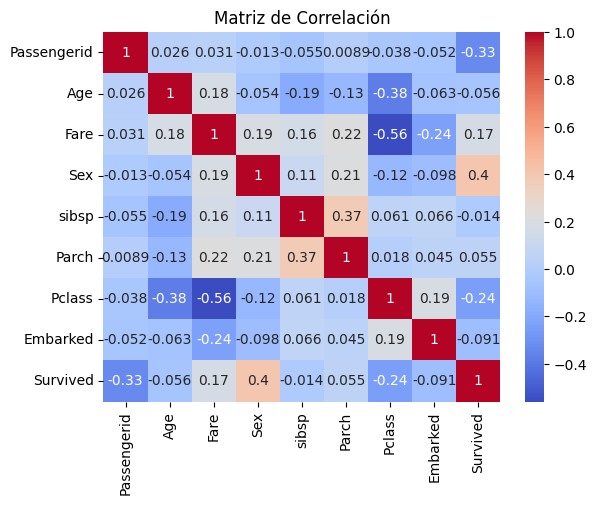

In [116]:
import seaborn as sns 
import matplotlib.pyplot as plt
corr_matriz= df.corr()

sns.heatmap(corr_matriz, annot=True, cmap='coolwarm') 
plt.title('Matriz de Correlación') 
plt.show() 

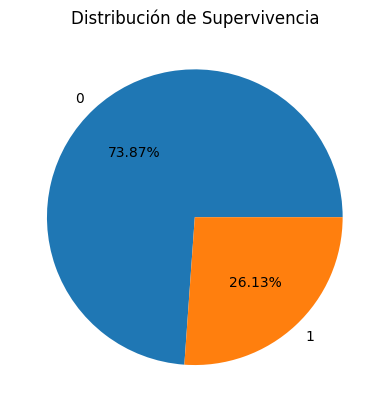

In [117]:
Survived_count = df['Survived'].value_counts()
plt.pie(Survived_count, labels=Survived_count.index, autopct='%1.2f%%' )
plt.title("Distribución de Supervivencia")
plt.show()

## Modelo de regresion logistica con descenso de gradiente estocastico.

In [118]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Variables del df 
X = df.drop(columns=['Survived'])
y = df['Survived']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función sigmoidea con límites para evitar overflow
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Limitar z para evitar overflow
    return 1 / (1 + np.exp(-z))

# Función de costo con manejo de epsilon para evitar log(0)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    A = sigmoid(z)
    epsilon = 1e-10  # Valor pequeño para evitar log(0)
    cost = - (1 / m) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    return cost

# Función de descenso de gradiente
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        A = sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (A - y))
        db = (1 / m) * np.sum(A - y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Cost after iteration {i}: {cost}")

    return w, b

# Función de predicción
def predict(X, w, b):
    z = np.dot(X, w) + b
    A = sigmoid(z)
    return A >= 0.5  # Devuelve True si la probabilidad es mayor o igual a 0.5

# Inicializar los parámetros
w = np.zeros(X_train_scaled.shape[1])  # Utiliza X_train_scaled para las características escaladas
b = 0
learning_rate = 0.01
num_iterations = 1500

# Entrenar el modelo con descenso de gradiente
w, b = gradient_descent(X_train_scaled, y_train.values, w, b, learning_rate, num_iterations)

# Hacer predicciones en el conjunto de prueba
y_pred_gd = predict(X_test_scaled, w, b)

# Evaluar el modelo
accuracy_gd = accuracy_score(y_test, y_pred_gd)
conf_matrix_gd = confusion_matrix(y_test, y_pred_gd)
classification_rep_gd = classification_report(y_test, y_pred_gd)

print(f"Accuracy: {accuracy_gd}")
print("Matriz de confusión:")
print(conf_matrix_gd)
print("Reporte de clasificación:")
print(classification_rep_gd)


Cost after iteration 0: 0.6918338680858228
Cost after iteration 100: 0.5923530502596008
Cost after iteration 200: 0.5338412063267794
Cost after iteration 300: 0.4967598311473463
Cost after iteration 400: 0.4717344840823824
Cost after iteration 500: 0.4539955768848478
Cost after iteration 600: 0.4409316803975859
Cost after iteration 700: 0.4310152499565405
Cost after iteration 800: 0.42330195708068435
Cost after iteration 900: 0.4171807874972054
Cost after iteration 1000: 0.4122411550847579
Cost after iteration 1100: 0.4081982508791126
Cost after iteration 1200: 0.4048490971622856
Cost after iteration 1300: 0.4020456244282722
Cost after iteration 1400: 0.39967760283109377
Accuracy: 0.8587786259541985
Matriz de confusión:
[[179  10]
 [ 27  46]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       189
           1       0.82      0.63      0.71        73

    accuracy                           0.86       262
   

## Resultados
- La funcion de costo disminuye de manera consistente a lo largo de las iteraciones, lo que indica que el modelo esta convergiendo correctamente.
- El modelo predice correctamente el 85.88% de las veces.

#### Matriz de confusion
- Verdaderos negativos (179):  El modelo predijo correctamente que 179 personas no sobrevivieron.
- Falsos positivos(10): El modelo predijo incorrectamente que 10 personas sobrevivieron cuando en realidad no lo hicieron.
- Falsos negativos(27) : El modelo predijo incorrectamente que 27 personas no sobrevivieron cuando en realidad sí lo hicieron.
- Verdaderos positivos(46): El modelo predijo correctamente que 46 personas sobrevivieron.

#### Clase 0:
- Precisión: 0.87, lo que significa que el 87% de las veces que el modelo predice que una persona no sobrevivió, está en lo correcto.
- Recall: 0.95, lo que indica que de todas las personas que realmente no sobrevivieron, el modelo identificó correctamente el 95%.
- F1-Score: 0.91

#### Clase 1: 
- Precisión: 0.82, lo que significa que el 82% de las veces que el modelo predice que una persona sobrevivió, está en lo correcto.
- Recall: 0.63, lo que significa que el modelo identificó correctamente el 63% de las personas que realmente sobrevivieron.
- F1-Score: 0.71, El modelo sigue teniendo problemas para predecir los pasajeros que sobreviven. 